# THIS IS NOTEBOOK FOR DATA IMPORTING FROM API's  

In [13]:
import pandas as pd
import requests

Lets create a reguest for stat.gov.pl api

In [14]:
url = 'https://bdl.stat.gov.pl/api/v1/data/by-variable/1641139?unit-level=2&lang=pl&format=json'
r = requests.get(url)
r.status_code

200

Turn response data into json, normalize and change into dataset.

In [15]:
data = r.json()['results']
data = pd.json_normalize(data,'values','name')
data = data.drop(axis=1, columns='attrId')
data.rename(columns = {'val':'building_permissions', 'name':'region'}, inplace="True")

In [16]:

data = data.astype({'year':'int'})
data.dtypes

year                     int64
building_permissions     int64
region                  object
dtype: object

In [17]:
data

,year,building_permissions,region
0,2011,40,MAŁOPOLSKIE
1,2012,35,MAŁOPOLSKIE
2,2013,25,MAŁOPOLSKIE
3,2014,22,MAŁOPOLSKIE
4,2015,29,MAŁOPOLSKIE
...,...,...,...
115,2018,21,WARMIŃSKO-MAZURSKIE
116,2019,16,WARMIŃSKO-MAZURSKIE
117,2020,11,WARMIŃSKO-MAZURSKIE
118,2021,32,WARMIŃSKO-MAZURSKIE


In [18]:
data_sum = data.groupby(['year'])['building_permissions'].sum()
data_sum

year
2011    229
2012    214
2013    166
2014    223
2015    248
2016    260
2017    379
2018    371
2019    307
2020    331
2021    417
2022    385
Name: building_permissions, dtype: int64

<AxesSubplot: xlabel='year', ylabel='building_permissions'>

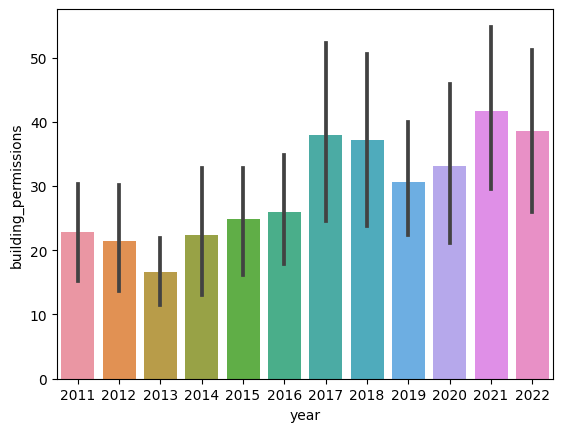

In [7]:
import seaborn as sns
sns.barplot(data, x=data['year'], y='building_permissions')

Pivot the table with regins as columns and years as indexes

In [8]:
data = data.pivot(index = 'year', columns='region', values='building_permissions')
data = data.reset_index()
data

region,year,DOLNOŚLĄSKIE,KUJAWSKO-POMORSKIE,LUBUSKIE,MAŁOPOLSKIE,OPOLSKIE,POMORSKIE,WARMIŃSKO-MAZURSKIE,WIELKOPOLSKIE,ZACHODNIOPOMORSKIE,ŚLĄSKIE
0,2011,36,16,10,40,3,33,10,38,24,19
1,2012,46,18,13,35,2,33,8,30,16,13
2,2013,18,20,3,25,3,23,16,31,9,18
3,2014,35,18,12,22,3,59,10,38,14,12
4,2015,36,30,4,29,1,44,12,37,25,30
5,2016,46,19,10,35,9,38,10,50,22,21
6,2017,42,28,11,50,1,63,24,78,35,47
7,2018,33,26,7,58,9,61,21,74,32,50
8,2019,55,21,14,38,10,52,16,43,31,27
9,2020,51,25,18,33,7,61,11,65,20,40


Save the data to file

<AxesSubplot: xlabel='year', ylabel='LUBUSKIE'>

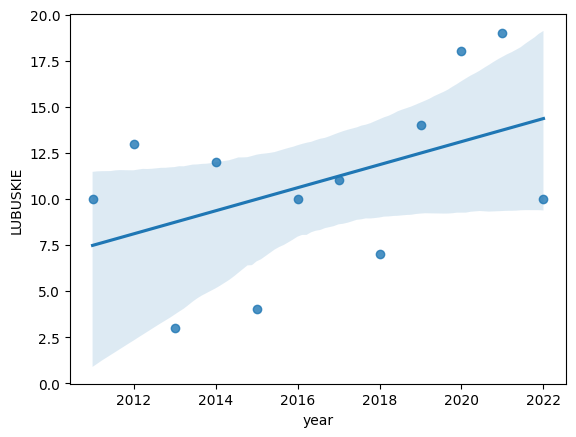

In [9]:

sns.regplot(data, x=data['year'], y=data['LUBUSKIE'])

<AxesSubplot: xlabel='year', ylabel='LUBUSKIE'>

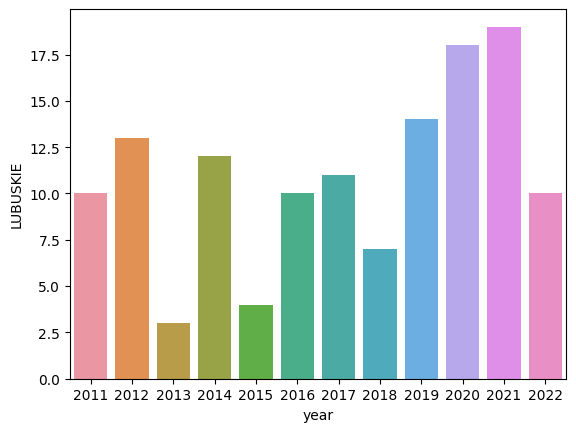

In [10]:
sns.barplot(data, x=data['year'], y=data['LUBUSKIE'])